In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def convert_to_grid_map(image_path, grid_size=(10, 10), threshold=0.5):
    # 读取图像并转换为灰度
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # 将图像二值化：设置阈值，墙壁和家具设为白色(255)，空白区域设为黑色(0)
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

    # 获取图像尺寸
    height, width = binary_image.shape
    
    # 根据栅格大小确定栅格地图尺寸
    grid_height = height // grid_size[1]
    grid_width = width // grid_size[0]
    grid_map = np.zeros((grid_height, grid_width), dtype=int)

    # 遍历每一个栅格单元，统计每个单元内的黑色像素数量
    for i in range(grid_height):
        for j in range(grid_width):
            # 获取该栅格单元的像素块
            cell = binary_image[i*grid_size[1]:(i+1)*grid_size[1], j*grid_size[0]:(j+1)*grid_size[0]]
            
            # 计算黑色像素占比
            black_pixel_ratio = np.mean(cell == 255)
            
            # 如果黑色像素比例高于阈值，则标记为占用单元
            if black_pixel_ratio > threshold:
                grid_map[i, j] = 1

    return grid_map

In [3]:
def plot_grid_map(grid_map):
    plt.imshow(grid_map, cmap='gray', origin='upper')
    plt.title("Grid Map")
    plt.xlabel("Grid X")
    plt.ylabel("Grid Y")
    plt.show()

(476, 636)


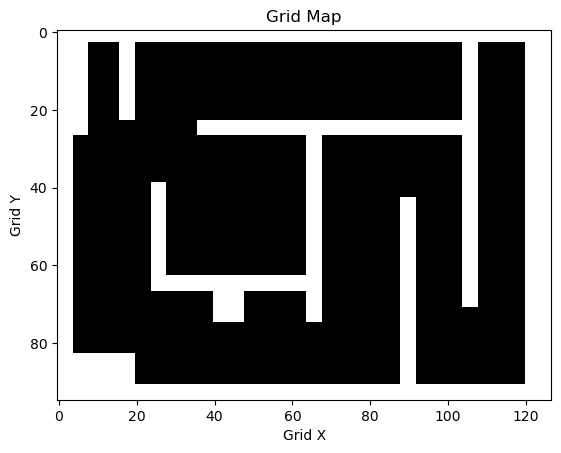

In [4]:
# 设置图片路径和栅格大小
image_path = "map2.png"
grid_size = (5, 5)  # 栅格大小 (宽度, 高度)
threshold = 1e-8   # 占用阈值

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
print(binary_image.shape)

# 转换为栅格地图
grid_map = convert_to_grid_map(image_path, grid_size, threshold)

# 可视化栅格地图
plot_grid_map(grid_map)

In [5]:
# 打印矩阵形式
print("Grid Map Matrix:")
print(grid_map)

# 可选：将矩阵保存为文本文件
np.savetxt("grid_map3.txt", grid_map, fmt="%d", delimiter=" ")


Grid Map Matrix:
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
